# NSW vs OSW confluence

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import sys

# Move two levels up (to the project root) and append the `src` folder
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

# Append src to sys.path
sys.path.append(src_path)

from src import query_engines, dataframe_visualizer

q = query_engines.QueryEngines()

# Replicate user classification evolution

In [2]:
START_DATE = "'2023-08-01'"
END_DATE = "'2024-08-01'"
DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE = 60 # how many days between the start date of the experiment and the first exposure table

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
    {'name':'days_between_start_date_and_first_exposure', 'value': str(DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE)},
]

q.prepare_query(
    'nsw_osw_confluence/customer_classification_evolution.sql'
    ,params=params
    ,to_load_file='customer_classifcation_evolution'
    ,load_from_to_load_file='customer_classifcation_evolution'
    
)

df  = q.query_run_starburst()

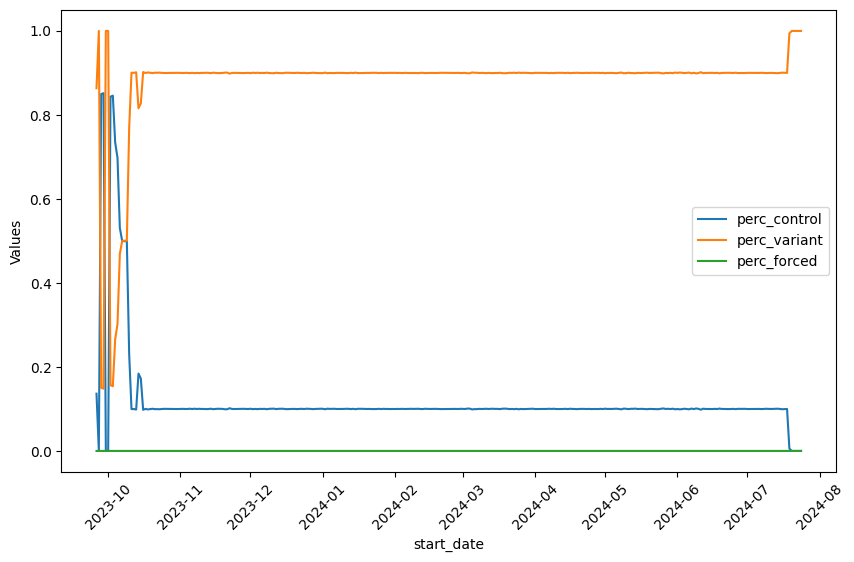

In [5]:
START_DATE = "'2023-08-01'"
END_DATE = "'2024-08-01'"

df['start_date'] = pd.to_datetime(df['start_date'])

cond1 = df['start_date'] >= pd.to_datetime(START_DATE)
cond2 = df['start_date'] <= pd.to_datetime(END_DATE)

df_pivoted = df[cond1 & cond2].pivot(index='start_date', columns='variant', values=['n_distinct_customers'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

df_pivoted['total'] = df_pivoted['n_distinct_customers__Control Group'] + df_pivoted['n_distinct_customers__Variant 1'] + df_pivoted['n_distinct_customers__forced_assignment']
df_pivoted['perc_control'] = df_pivoted['n_distinct_customers__Control Group']/df_pivoted['total']
df_pivoted['perc_variant'] = df_pivoted['n_distinct_customers__Variant 1']/df_pivoted['total']
df_pivoted['perc_forced'] = df_pivoted['n_distinct_customers__forced_assignment']/df_pivoted['total']

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted)
v.multiple_variable_lineplot(
    'start_date',
    ['perc_control','perc_variant','perc_forced']
)

# Comparison Category Opened vs Store Wall even

In [8]:
START_DATE = "'2024-02-01'"
END_DATE = "'2024-08-01'"
DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE = 30

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
    {'name':'days_between_start_date_and_first_exposure', 'value': str(DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE)}
]

q.prepare_query(
    'nsw_osw_confluence/co_sw_comparison.sql'
    ,params=params
    ,to_load_file='co_sw_comparison'
    ,load_from_to_load_file='co_sw_comparison'
    
)

df  = q.query_run_starburst()

In [9]:
tmp = df.copy()

In [10]:
df['variant'].unique()

array(['Control Group', nan, 'Variant 1', 'forced_assignment'],
      dtype=object)

In [11]:
df['category'].unique()

array(['Shops', 'Health', 'Groceries', 'Food'], dtype=object)

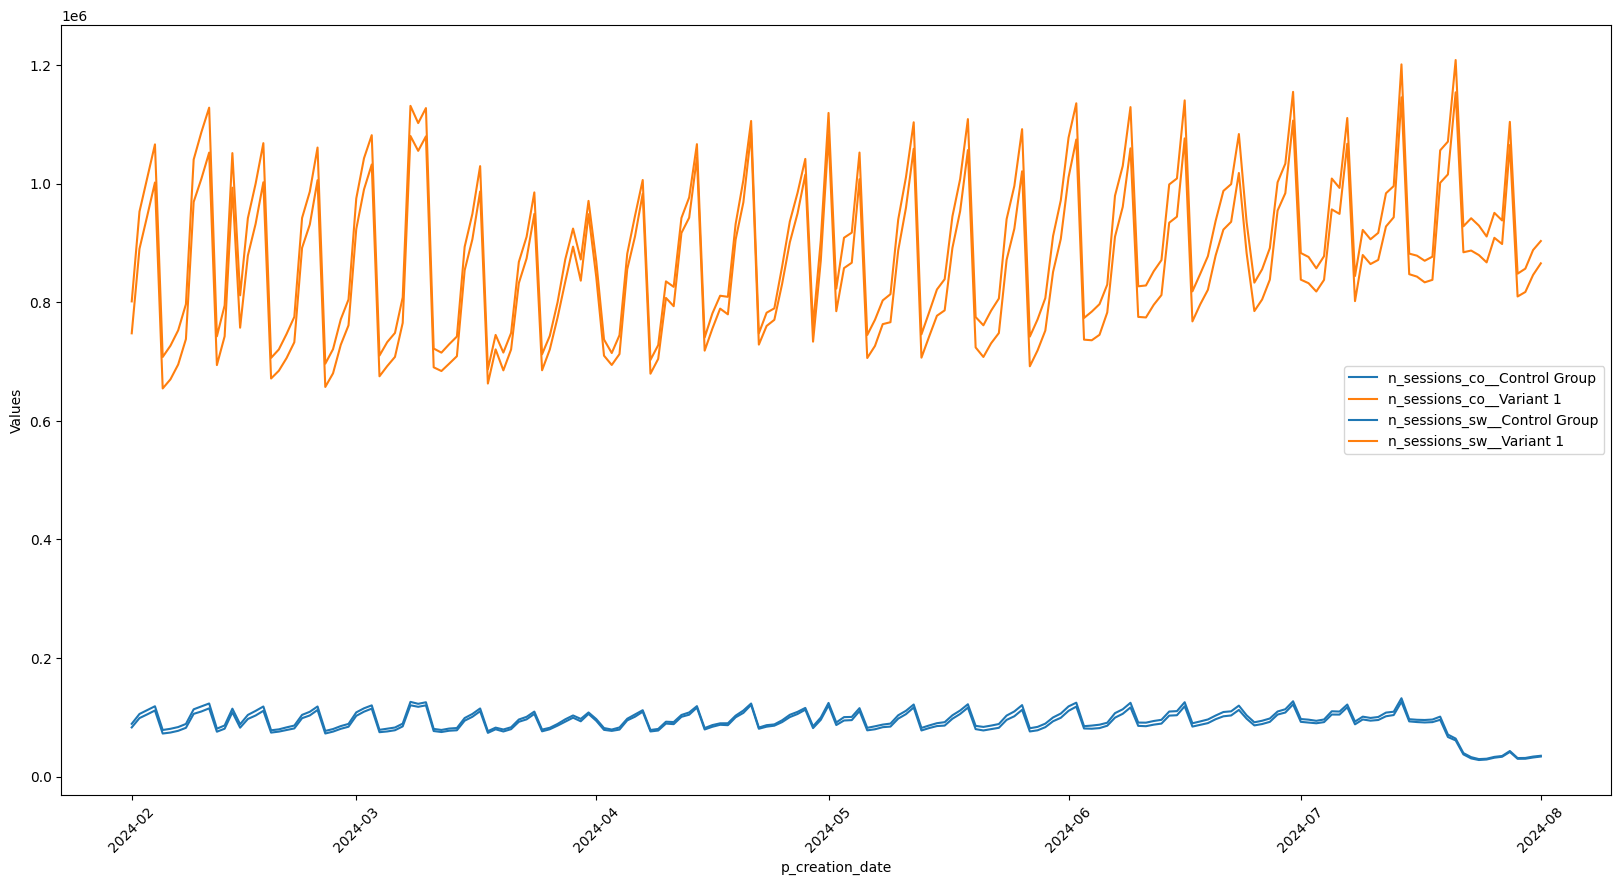

In [12]:
tmp = df.copy()

START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Food'

tmp = tmp[cond1 & cond2 & cond3]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_co','n_sessions_sw'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date'
    ,['n_sessions_co__Control Group','n_sessions_co__Variant 1','n_sessions_sw__Control Group','n_sessions_sw__Variant 1']
    ,colors=['blue','orange','blue','orange']
)

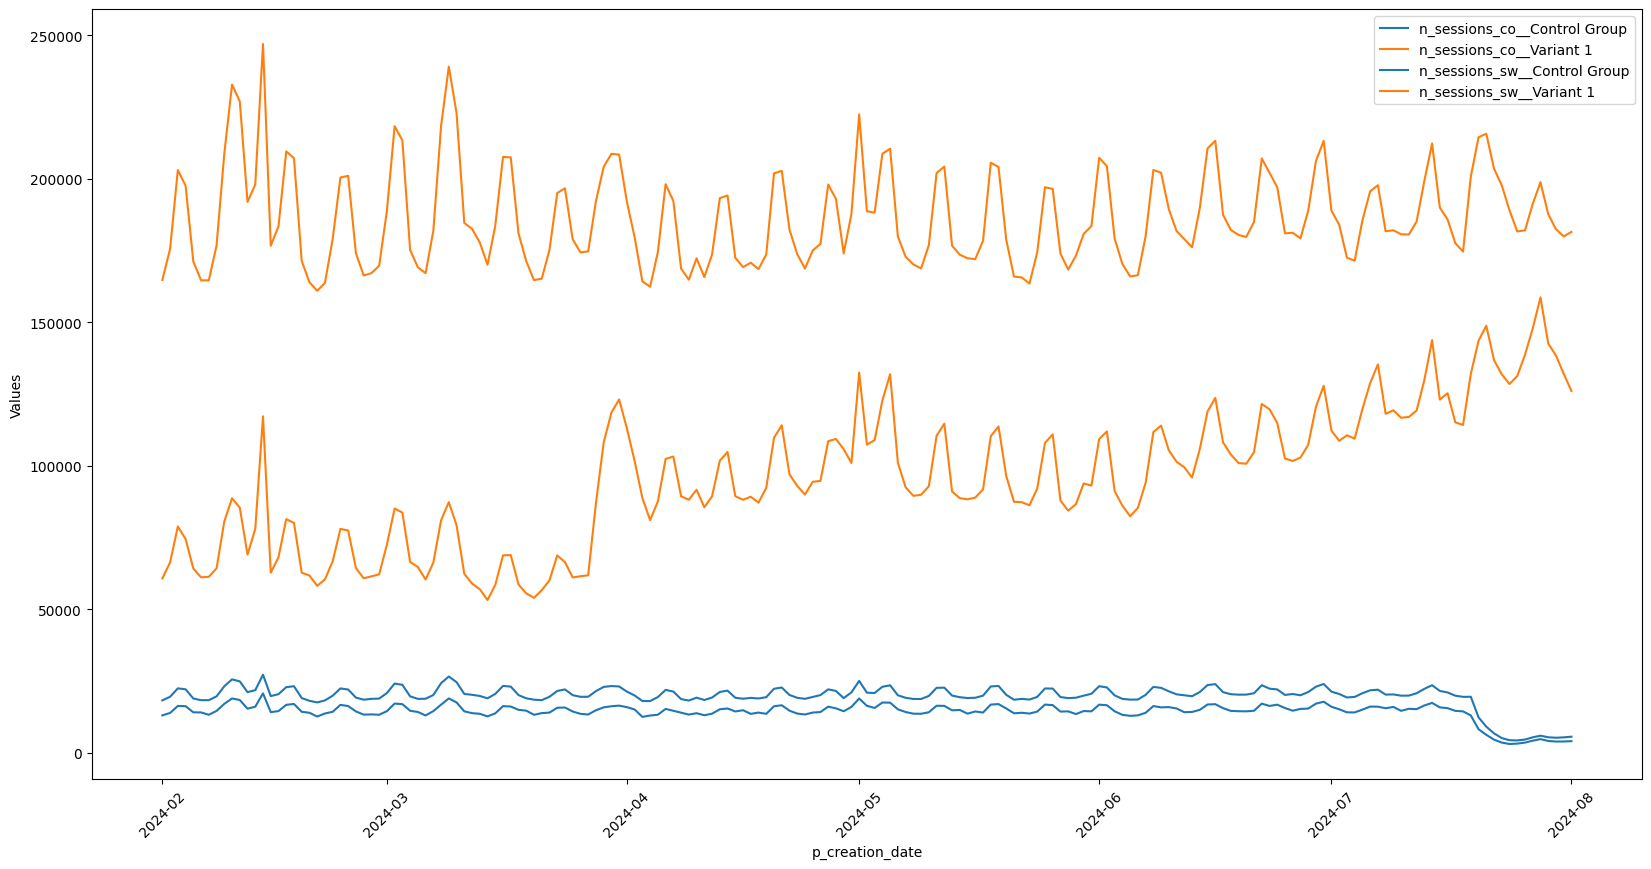

In [13]:
tmp = df.copy()

START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Groceries'

tmp = tmp[cond1 & cond2 & cond3]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_co','n_sessions_sw'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date'
    ,['n_sessions_co__Control Group','n_sessions_co__Variant 1','n_sessions_sw__Control Group','n_sessions_sw__Variant 1']
    ,colors=['blue','orange','blue','orange']
)

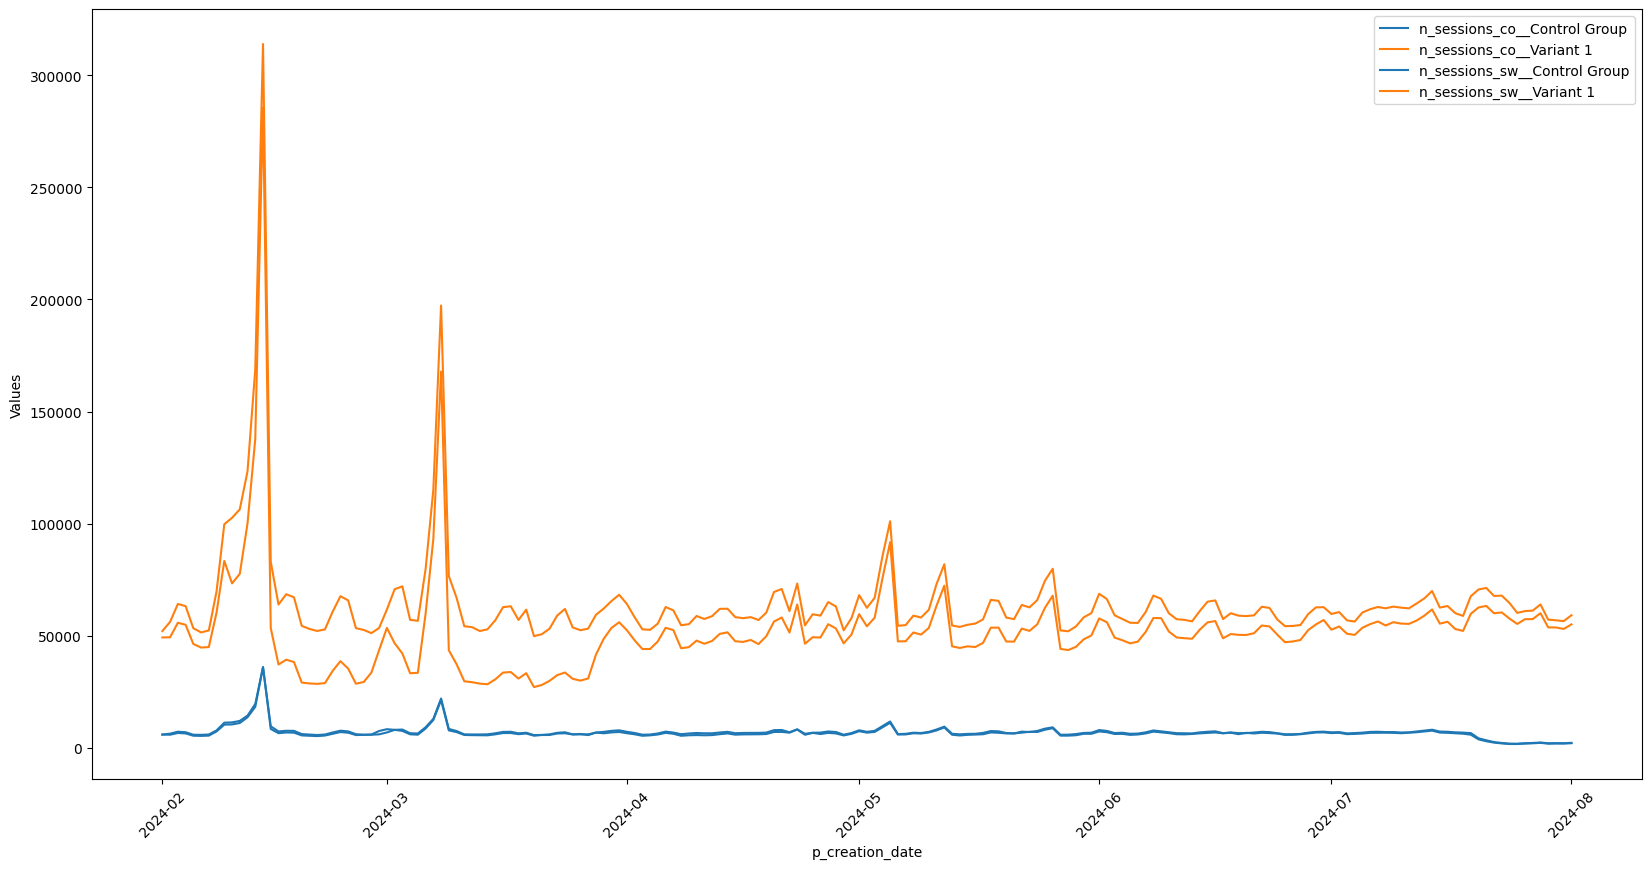

In [14]:
tmp = df.copy()

START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Shops'

tmp = tmp[cond1 & cond2 & cond3]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_co','n_sessions_sw'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date'
    ,['n_sessions_co__Control Group','n_sessions_co__Variant 1','n_sessions_sw__Control Group','n_sessions_sw__Variant 1']
    ,colors=['blue','orange','blue','orange']
)

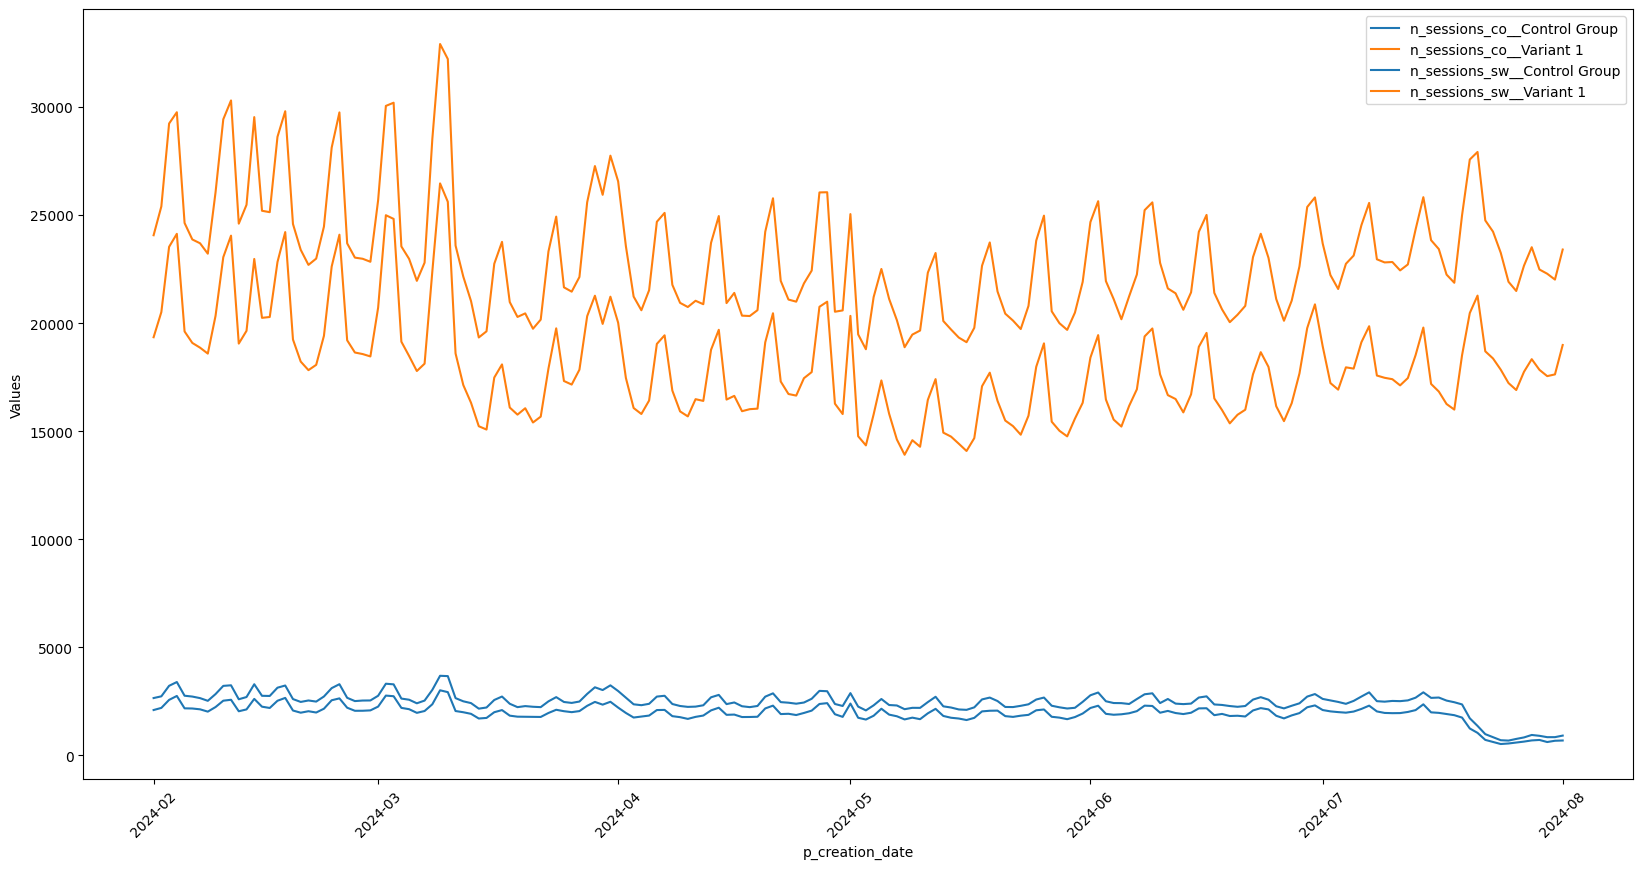

In [15]:
tmp = df.copy()

START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Health'

tmp = tmp[cond1 & cond2 & cond3]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_co','n_sessions_sw'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date'
    ,['n_sessions_co__Control Group','n_sessions_co__Variant 1','n_sessions_sw__Control Group','n_sessions_sw__Variant 1']
    ,colors=['blue','orange','blue','orange']
)

# Building the funnels

SW to OC
SW to PA 
SW to SA
CO to OC

if possible SW to SA to PA to OC (in brute force or checking order)

### (0) Sanity Check on using SW based, and not CO

In [119]:
START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"
DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE = 30

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
    {'name':'days_between_start_date_and_first_exposure', 'value': str(DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE)}
]

q.prepare_query(
    'nsw_osw_confluence/funnel_sw_oc.sql'
    ,params=params
    ,to_load_file='funnel_sw_oc'
    ,load_from_to_load_file='funnel_sw_oc'
    
)

df  = q.query_run_starburst()

In [120]:
df['variant'].unique()

array(['Control Group', 'Variant 1', nan, 'forced_assignment'],
      dtype=object)

In [121]:
df['category'].unique()

array(['Food', 'Groceries', 'Health', 'Shops', nan], dtype=object)

In [122]:
tmp = df.copy()
tmp = tmp.drop(columns=['variant'])

tmp['category'] = tmp['category'].fillna('Undefined')

tmp_grouped = tmp.groupby(['category'])[['n_sessions_sw','n_sessions_orders']].sum().reset_index()
tmp_grouped

,category,n_sessions_sw,n_sessions_orders
0,Food,215866837,89708386
1,Groceries,24779379,7308281
2,Health,4745341,683082
3,Shops,13657436,982409
4,Undefined,26289985,0


In [123]:
tmp_grouped.sum()

category             FoodGroceriesHealthShopsUndefined
n_sessions_sw                                285338978
n_sessions_orders                             98682158
dtype: object

In [124]:
tmp = df.copy()
tmp = tmp.drop(columns=['category'])

tmp['variant'] = tmp['variant'].fillna('Undefined')

tmp_grouped = tmp.groupby(['variant'])[['n_sessions_sw','n_sessions_orders']].sum().reset_index()
tmp_grouped

,variant,n_sessions_sw,n_sessions_orders
0,Control Group,24637738,9099511
1,Undefined,33304740,7101831
2,Variant 1,227396410,82480808
3,forced_assignment,90,8


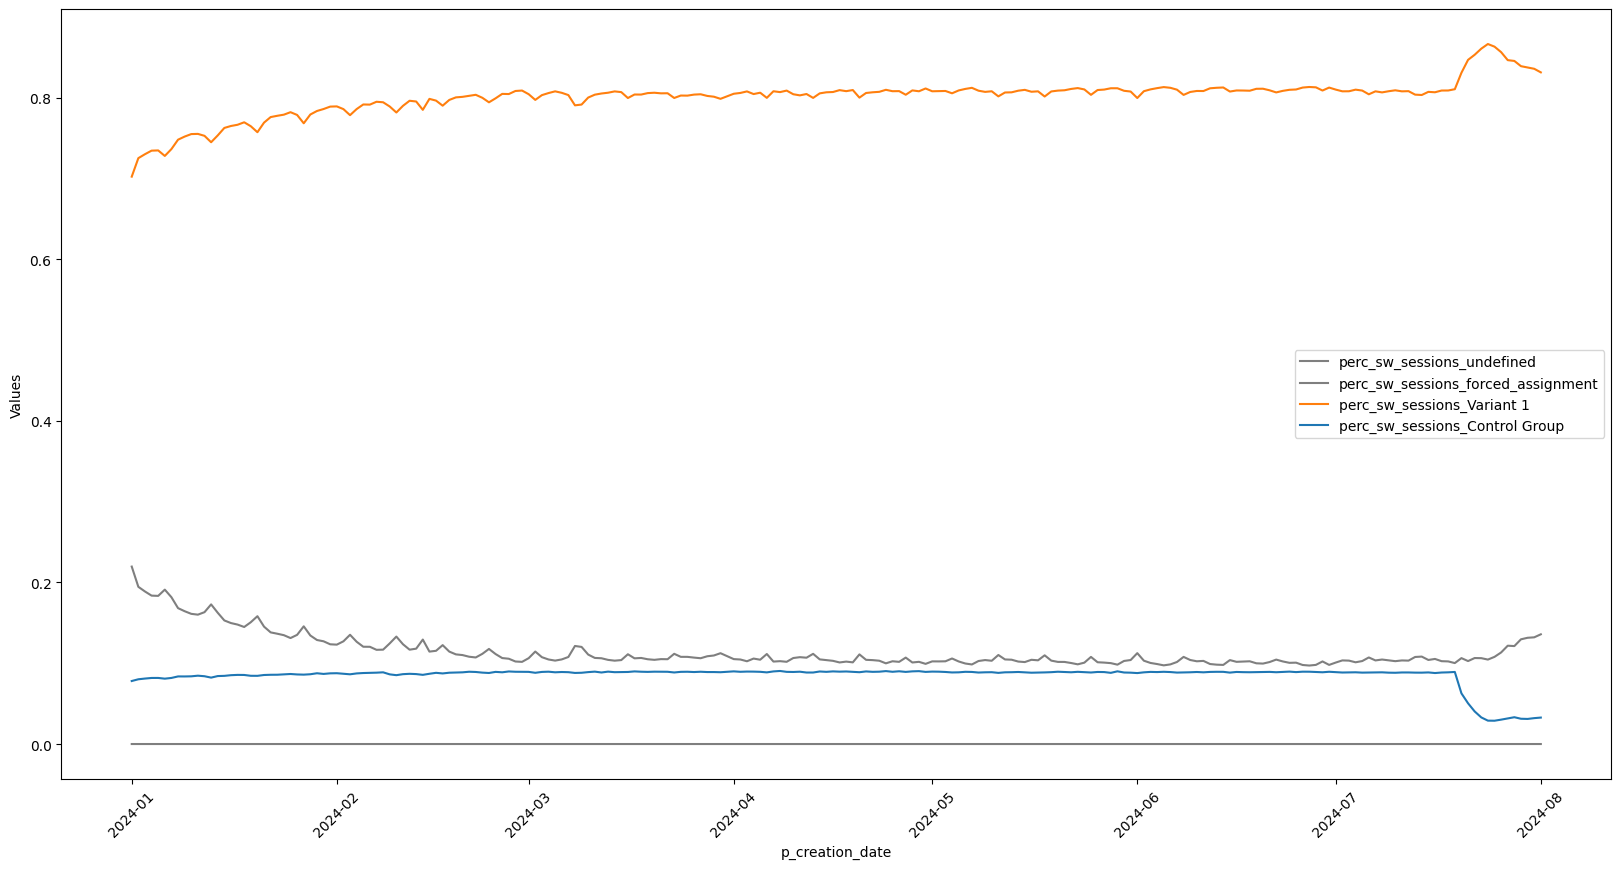

In [131]:
tmp = df.copy()

tmp['variant'] = tmp['variant'].fillna('undefined')
tmp['category'] = tmp['category'].fillna('undefined')

START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Food'

tmp = tmp[cond1 & cond2 & cond3]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_sw','n_sessions_orders'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

# Distribution between variants

df_pivoted['total_sw_sessions'] = df_pivoted['n_sessions_sw__undefined'] + df_pivoted['n_sessions_sw__forced_assignment'] + df_pivoted['n_sessions_sw__Variant 1'] + df_pivoted['n_sessions_sw__Control Group']
df_pivoted['perc_sw_sessions_undefined'] = df_pivoted['n_sessions_sw__undefined']/df_pivoted['total_sw_sessions']
df_pivoted['perc_sw_sessions_forced_assignment'] = df_pivoted['n_sessions_sw__forced_assignment']/df_pivoted['total_sw_sessions']
df_pivoted['perc_sw_sessions_Variant 1'] = df_pivoted['n_sessions_sw__Variant 1']/df_pivoted['total_sw_sessions']
df_pivoted['perc_sw_sessions_Control Group'] = df_pivoted['n_sessions_sw__Control Group']/df_pivoted['total_sw_sessions']

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date'
    ,['perc_sw_sessions_undefined','perc_sw_sessions_forced_assignment','perc_sw_sessions_Variant 1','perc_sw_sessions_Control Group']
    ,colors=['gray', 'gray', 'orange', 'blue']
)

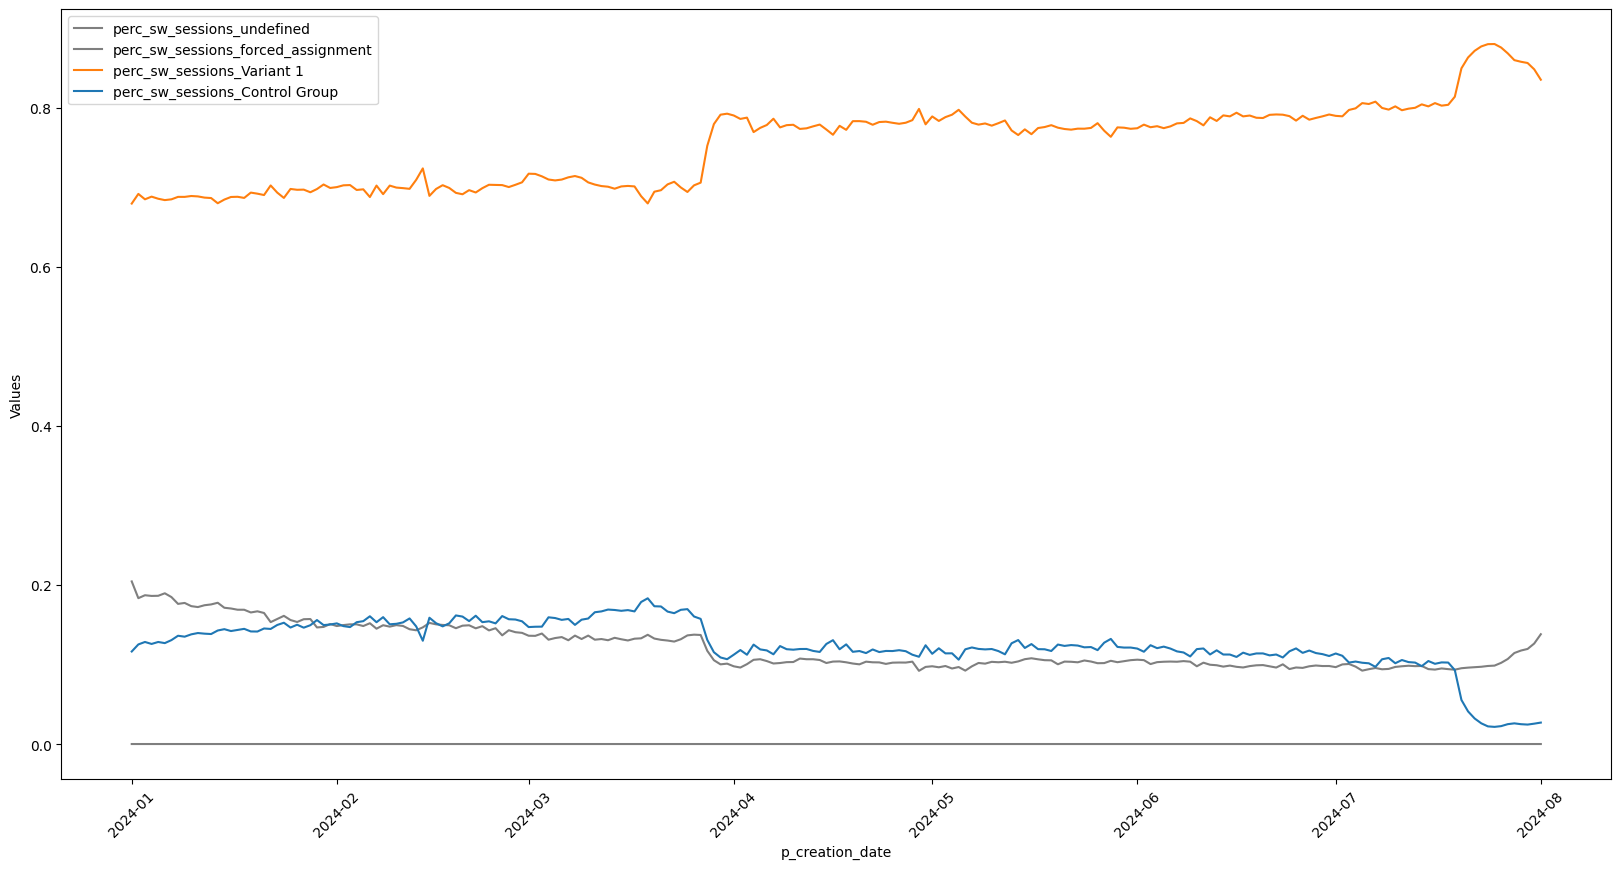

In [132]:
tmp = df.copy()

tmp['variant'] = tmp['variant'].fillna('undefined')
tmp['category'] = tmp['category'].fillna('undefined')

START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Groceries'

tmp = tmp[cond1 & cond2 & cond3]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_sw','n_sessions_orders'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

# Distribution between variants

df_pivoted['total_sw_sessions'] = df_pivoted['n_sessions_sw__undefined'] + df_pivoted['n_sessions_sw__forced_assignment'] + df_pivoted['n_sessions_sw__Variant 1'] + df_pivoted['n_sessions_sw__Control Group']
df_pivoted['perc_sw_sessions_undefined'] = df_pivoted['n_sessions_sw__undefined']/df_pivoted['total_sw_sessions']
df_pivoted['perc_sw_sessions_forced_assignment'] = df_pivoted['n_sessions_sw__forced_assignment']/df_pivoted['total_sw_sessions']
df_pivoted['perc_sw_sessions_Variant 1'] = df_pivoted['n_sessions_sw__Variant 1']/df_pivoted['total_sw_sessions']
df_pivoted['perc_sw_sessions_Control Group'] = df_pivoted['n_sessions_sw__Control Group']/df_pivoted['total_sw_sessions']

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date'
    ,['perc_sw_sessions_undefined','perc_sw_sessions_forced_assignment','perc_sw_sessions_Variant 1','perc_sw_sessions_Control Group']
    ,colors=['gray', 'gray', 'orange', 'blue']
)

### (1) Sanity Check on why CVR Groceries

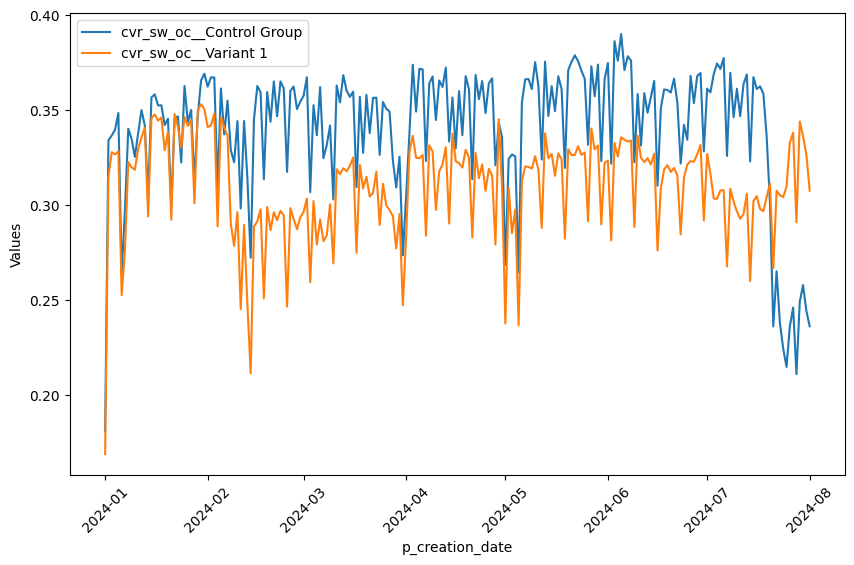

In [133]:
tmp = df.copy()

tmp['variant'] = tmp['variant'].fillna('undefined')
tmp['category'] = tmp['category'].fillna('undefined')

START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Groceries'
cond4 = tmp['variant'].isin(['Variant 1','Control Group'])

tmp = tmp[cond1 & cond2 & cond3 & cond4]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_sw','n_sessions_orders'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

df_pivoted['cvr_sw_oc__Control Group'] = df_pivoted['n_sessions_orders__Control Group']/df_pivoted['n_sessions_sw__Control Group']
df_pivoted['cvr_sw_oc__Variant 1'] = df_pivoted['n_sessions_orders__Variant 1']/df_pivoted['n_sessions_sw__Variant 1']

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted)

v.multiple_variable_lineplot(
    'p_creation_date',
    ['cvr_sw_oc__Control Group','cvr_sw_oc__Variant 1'],
    colors=['blue','orange']
)


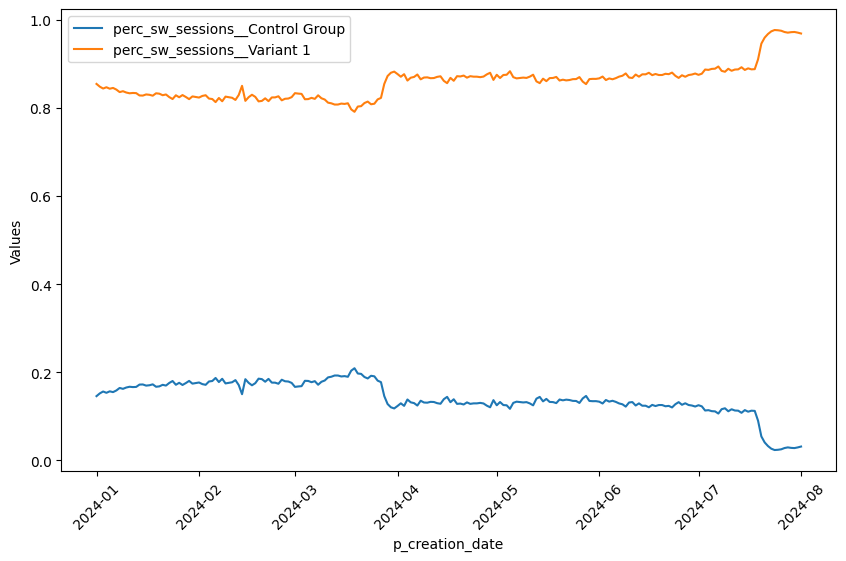

In [56]:
df_pivoted['total_sw_sessions'] = df_pivoted['n_sessions_sw__Control Group'] + df_pivoted['n_sessions_sw__Variant 1']
df_pivoted['perc_sw_sessions__Control Group'] = df_pivoted['n_sessions_sw__Control Group']/df_pivoted['total_sw_sessions']
df_pivoted['perc_sw_sessions__Variant 1'] = df_pivoted['n_sessions_sw__Variant 1']/df_pivoted['total_sw_sessions']


v.multiple_variable_lineplot(
    'p_creation_date',
    ['perc_sw_sessions__Control Group','perc_sw_sessions__Variant 1'],
    colors=['blue','orange']
)


In [57]:
df_pivoted

,p_creation_date,n_sessions_sw__Control Group,n_sessions_sw__Variant 1,n_sessions_orders__Control Group,n_sessions_orders__Variant 1,cvr_sw_oc__Control Group,cvr_sw_oc__Variant 1,total_sw_sessions,perc_sw_sessions__Control Group,perc_sw_sessions__Variant 1
0,2024-01-01,15765,92377,2714,14805,0.172154,0.160267,108142,0.145781,0.854219
1,2024-01-02,15549,86722,4973,25971,0.319828,0.299474,102271,0.152037,0.847963
2,2024-01-03,14480,78177,4681,24372,0.323273,0.311754,92657,0.156275,0.843725
3,2024-01-04,13676,75509,4438,23429,0.324510,0.310281,89185,0.153344,0.846656
4,2024-01-05,15620,84084,5204,26317,0.333163,0.312985,99704,0.156664,0.843336
...,...,...,...,...,...,...,...,...,...,...
209,2024-07-28,4831,159033,1022,46262,0.211550,0.290896,163864,0.029482,0.970518
210,2024-07-29,4174,142986,1039,49193,0.248922,0.344041,147160,0.028364,0.971636
211,2024-07-30,3985,138790,1029,46665,0.258218,0.336227,142775,0.027911,0.972089
212,2024-07-31,4013,132405,982,43246,0.244705,0.326619,136418,0.029417,0.970583


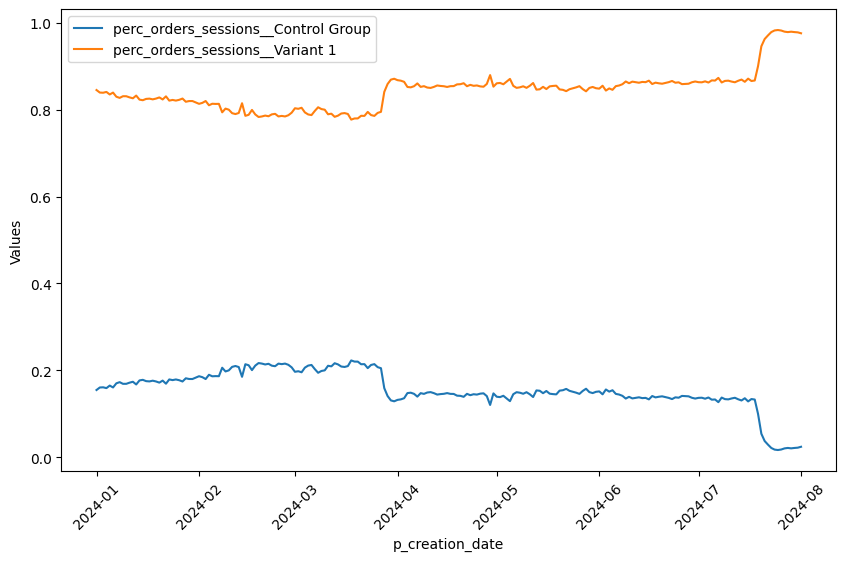

In [58]:
df_pivoted['total_orders_sessions'] = df_pivoted['n_sessions_orders__Control Group'] + df_pivoted['n_sessions_orders__Variant 1']
df_pivoted['perc_orders_sessions__Control Group'] = df_pivoted['n_sessions_orders__Control Group']/df_pivoted['total_orders_sessions']
df_pivoted['perc_orders_sessions__Variant 1'] = df_pivoted['n_sessions_orders__Variant 1']/df_pivoted['total_orders_sessions']


v.multiple_variable_lineplot(
    'p_creation_date',
    ['perc_orders_sessions__Control Group','perc_orders_sessions__Variant 1'],
    colors=['blue','orange']
)


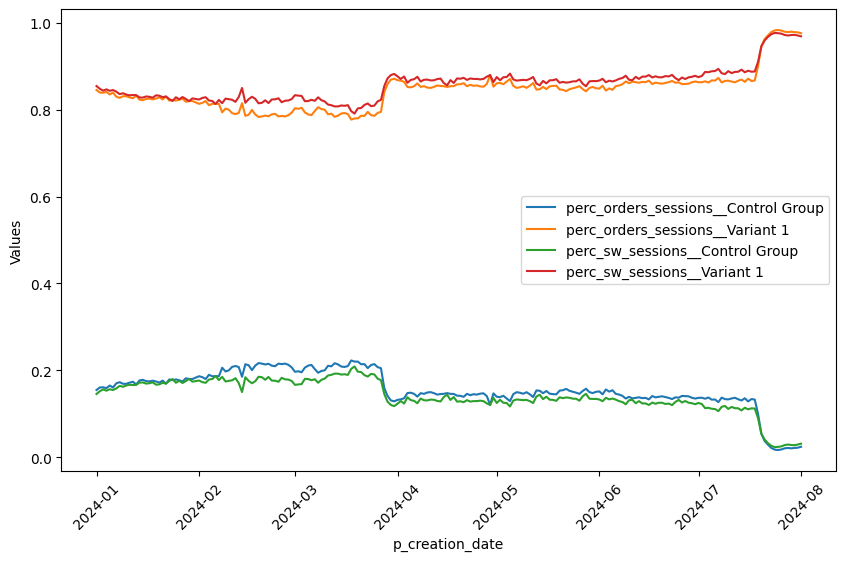

In [59]:
v.multiple_variable_lineplot(
    'p_creation_date',
    ['perc_orders_sessions__Control Group','perc_orders_sessions__Variant 1','perc_sw_sessions__Control Group','perc_sw_sessions__Variant 1'],
)


### (2) Sanity Check no why CVR Groceries

In [60]:
START_DATE = "'2024-04-01'"
END_DATE = "'2024-08-01'"
DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE = 30

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
    {'name':'days_between_start_date_and_first_exposure', 'value': str(DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE)}
]

q.prepare_query(
    'nsw_osw_confluence/funnel_co_sw.sql'
    ,params=params
    ,to_load_file='funnel_co_sw'
    ,load_from_to_load_file='funnel_co_sw'
    
)

df  = q.query_run_starburst()

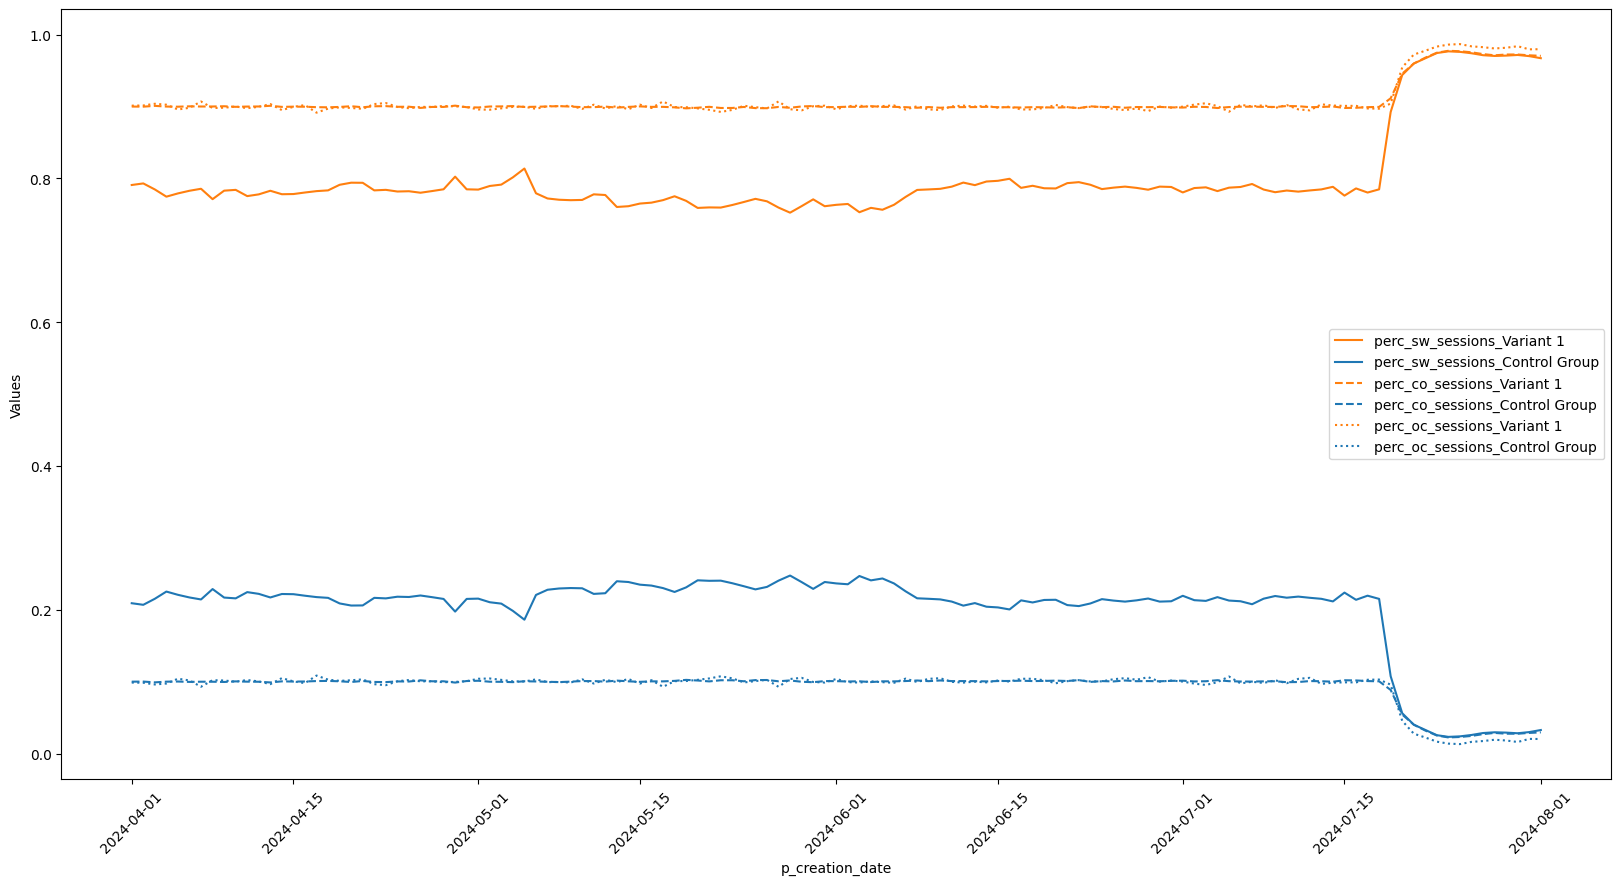

In [66]:
tmp = df.copy()

tmp['variant'] = tmp['variant'].fillna('undefined')
tmp['category'] = tmp['category'].fillna('undefined')

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond = tmp['category'] == 'Groceries'
cond2 = tmp['variant'].isin(['Control Group','Variant 1'])

tmp = tmp[cond & cond2]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_co','n_sessions_sw','n_sessions_oc'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

# Distribution between variants

df_pivoted['total_sw_sessions'] = df_pivoted['n_sessions_sw__Variant 1'] + df_pivoted['n_sessions_sw__Control Group']
df_pivoted['perc_sw_sessions_Variant 1'] = df_pivoted['n_sessions_sw__Variant 1']/df_pivoted['total_sw_sessions']
df_pivoted['perc_sw_sessions_Control Group'] = df_pivoted['n_sessions_sw__Control Group']/df_pivoted['total_sw_sessions']

df_pivoted['total_co_sessions'] = df_pivoted['n_sessions_co__Variant 1'] + df_pivoted['n_sessions_co__Control Group']
df_pivoted['perc_co_sessions_Variant 1'] = df_pivoted['n_sessions_co__Variant 1']/df_pivoted['total_co_sessions']
df_pivoted['perc_co_sessions_Control Group'] = df_pivoted['n_sessions_co__Control Group']/df_pivoted['total_co_sessions']

df_pivoted['total_oc_sessions'] = df_pivoted['n_sessions_oc__Variant 1'] + df_pivoted['n_sessions_oc__Control Group']
df_pivoted['perc_oc_sessions_Variant 1'] = df_pivoted['n_sessions_oc__Variant 1']/df_pivoted['total_oc_sessions']
df_pivoted['perc_oc_sessions_Control Group'] = df_pivoted['n_sessions_oc__Control Group']/df_pivoted['total_oc_sessions']

df_pivoted['cvr_sw_oc__Control Group'] = df_pivoted['n_sessions_oc__Control Group']/df_pivoted['n_sessions_sw__Control Group']
df_pivoted['cvr_sw_oc__Variant 1'] = df_pivoted['n_sessions_oc__Variant 1']/df_pivoted['n_sessions_sw__Variant 1']

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date'
    ,['perc_sw_sessions_Variant 1','perc_sw_sessions_Control Group'
      ,'perc_co_sessions_Variant 1','perc_co_sessions_Control Group'
      ,'perc_oc_sessions_Variant 1','perc_oc_sessions_Control Group']
    ,colors=['orange', 'blue', 'orange', 'blue','orange','blue']
    ,style=['s1','s1','s2','s2','s4','s4']
)

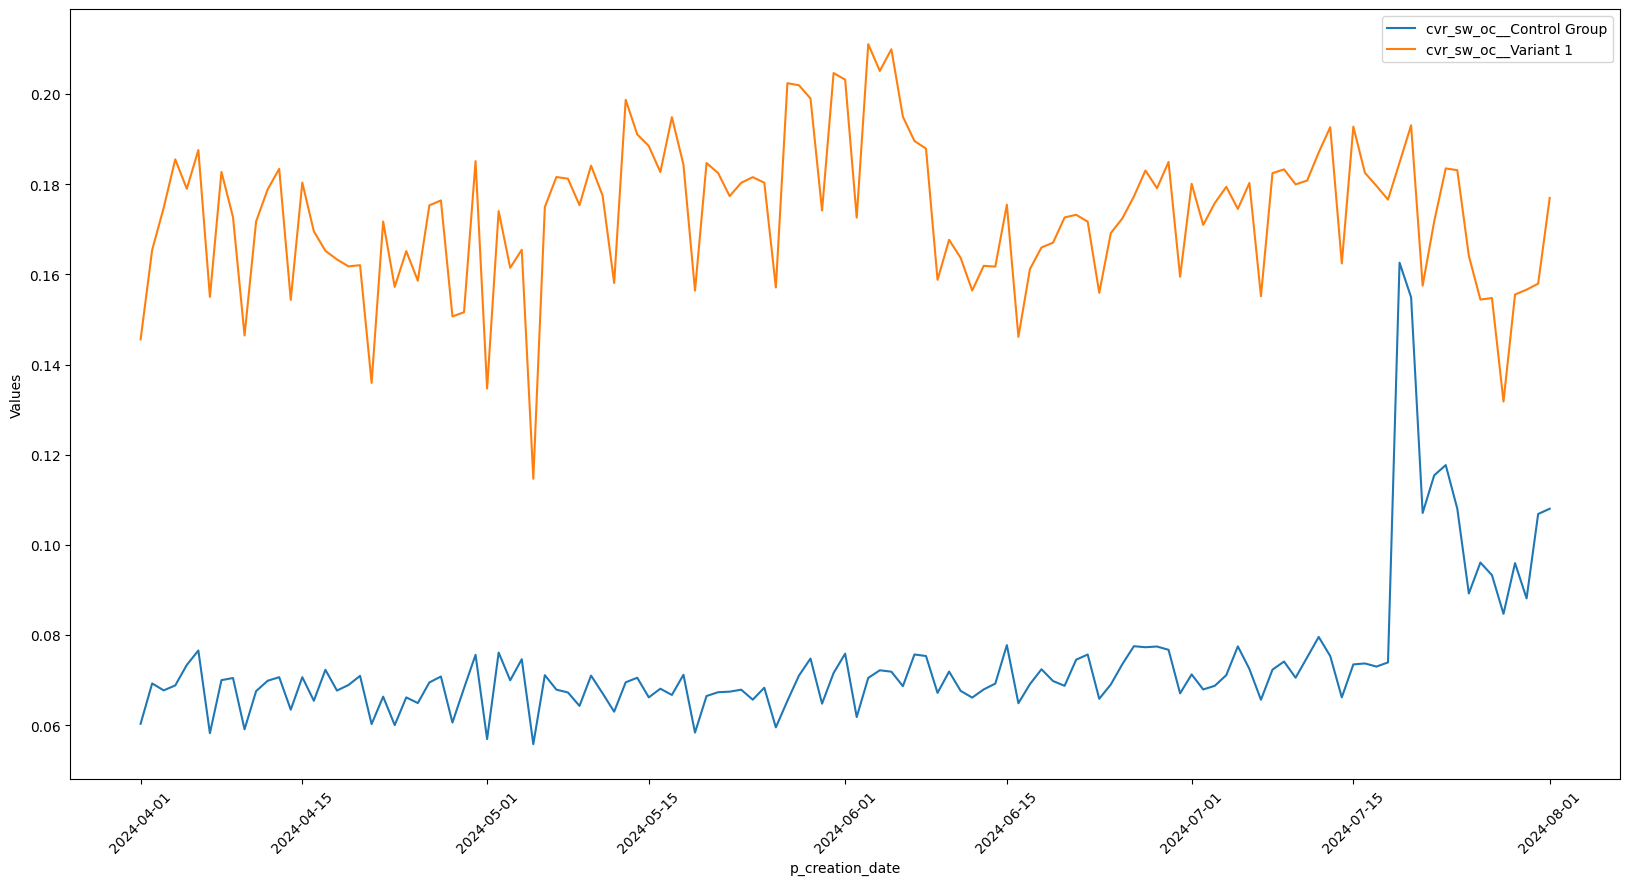

In [67]:
v.multiple_variable_lineplot(
    'p_creation_date',
    ['cvr_sw_oc__Control Group','cvr_sw_oc__Variant 1'],
    colors=['blue','orange']
)

### (3) Changes in query if its consistent with point (2)

In [134]:
START_DATE = "'2024-05-01'"
END_DATE = "'2024-07-01'"
DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE = 30

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
    {'name':'days_between_start_date_and_first_exposure', 'value': str(DAYS_BETWEEN_START_DATE_AND_FIRST_EXPOSURE)}
]

q.prepare_query(
    'nsw_osw_confluence/funnel_co_sw_sanity.sql'
    ,params=params
    ,to_load_file='funnel_co_sw_sanity'
    ,load_from_to_load_file='funnel_co_sw_sanity'
    
)

df  = q.query_run_starburst()

#### Food

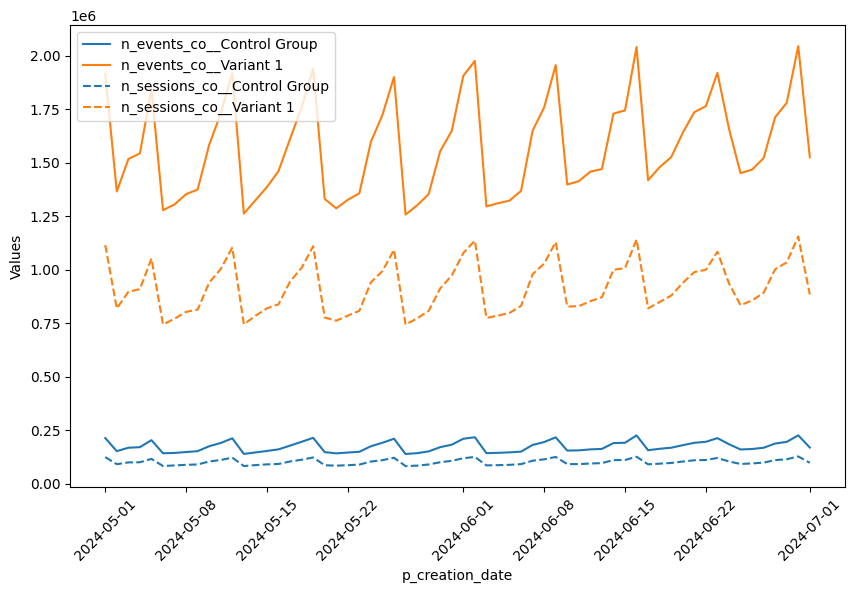

In [137]:
tmp = df.copy()

tmp['variant'] = tmp['variant'].fillna('undefined')
tmp['category'] = tmp['category'].fillna('undefined')

START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Food'
cond4 = tmp['variant'].isin(['Variant 1','Control Group'])

tmp = tmp[cond1 & cond2 & cond3 & cond4]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_co','n_sessions_sw','n_sessions_oc','n_events_co','n_events_sw','n_events_oc'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

# sessions percentage
df_pivoted['total_sw_sessions'] = df_pivoted['n_sessions_sw__Variant 1'] + df_pivoted['n_sessions_sw__Control Group']
df_pivoted['perc_sw_sessions__Variant 1'] = df_pivoted['n_sessions_sw__Variant 1']/df_pivoted['total_sw_sessions']
df_pivoted['perc_sw_sessions__Control Group'] = df_pivoted['n_sessions_sw__Control Group']/df_pivoted['total_sw_sessions']

df_pivoted['total_co_sessions'] = df_pivoted['n_sessions_co__Variant 1'] + df_pivoted['n_sessions_co__Control Group']
df_pivoted['perc_co_sessions__Variant 1'] = df_pivoted['n_sessions_co__Variant 1']/df_pivoted['total_co_sessions']
df_pivoted['perc_co_sessions__Control Group'] = df_pivoted['n_sessions_co__Control Group']/df_pivoted['total_co_sessions']

df_pivoted['total_oc_sessions'] = df_pivoted['n_sessions_oc__Variant 1'] + df_pivoted['n_sessions_oc__Control Group']
df_pivoted['perc_oc_sessions__Variant 1'] = df_pivoted['n_sessions_oc__Variant 1']/df_pivoted['total_oc_sessions']
df_pivoted['perc_oc_sessions__Control Group'] = df_pivoted['n_sessions_oc__Control Group']/df_pivoted['total_oc_sessions']

# events percentage
df_pivoted['total_sw_events'] = df_pivoted['n_events_sw__Variant 1'] + df_pivoted['n_events_sw__Control Group']
df_pivoted['perc_sw_events__Variant 1'] = df_pivoted['n_events_sw__Variant 1']/df_pivoted['total_sw_events']
df_pivoted['perc_sw_events__Control Group'] = df_pivoted['n_events_sw__Control Group']/df_pivoted['total_sw_events']

df_pivoted['total_co_events'] = df_pivoted['n_events_co__Variant 1'] + df_pivoted['n_events_co__Control Group']
df_pivoted['perc_co_events__Variant 1'] = df_pivoted['n_events_co__Variant 1']/df_pivoted['total_co_events']
df_pivoted['perc_co_events__Control Group'] = df_pivoted['n_events_co__Control Group']/df_pivoted['total_co_events']

df_pivoted['total_oc_events'] = df_pivoted['n_events_oc__Variant 1'] + df_pivoted['n_events_oc__Control Group']
df_pivoted['perc_oc_events__Variant 1'] = df_pivoted['n_events_oc__Variant 1']/df_pivoted['total_oc_events']
df_pivoted['perc_oc_events__Control Group'] = df_pivoted['n_events_oc__Control Group']/df_pivoted['total_oc_events']


v = dataframe_visualizer.DataFrameVisualizer(df_pivoted)

v.multiple_variable_lineplot(
    'p_creation_date',
    ['n_events_co__Control Group','n_events_co__Variant 1',
     'n_sessions_co__Control Group','n_sessions_co__Variant 1'],
    colors=['blue','orange','blue','orange'],
    style=['s1','s1','s2','s2']
)

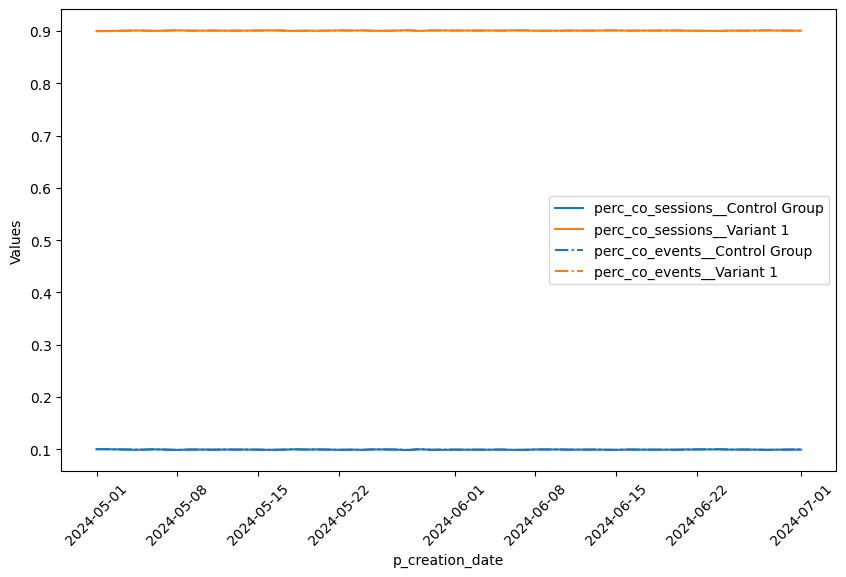

In [138]:
v.multiple_variable_lineplot(
    'p_creation_date',
    ['perc_co_sessions__Control Group','perc_co_sessions__Variant 1',
     'perc_co_events__Control Group','perc_co_events__Variant 1'],
    colors=['blue','orange','blue','orange'],
    style=['s1','s1','s3','s3']
)

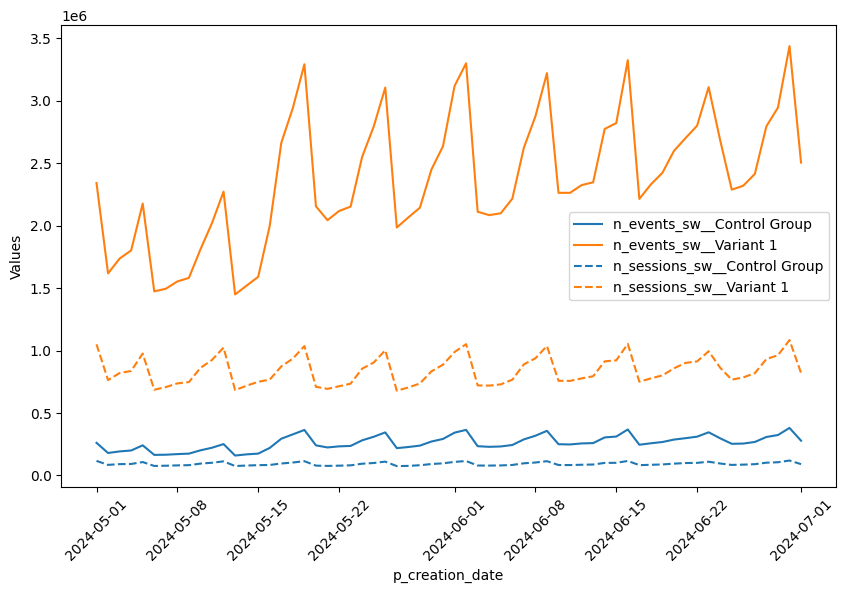

In [139]:
v.multiple_variable_lineplot(
    'p_creation_date',
    ['n_events_sw__Control Group','n_events_sw__Variant 1',
     'n_sessions_sw__Control Group','n_sessions_sw__Variant 1'],
    colors=['blue','orange','blue','orange'],
    style=['s1','s1','s2','s2']
)

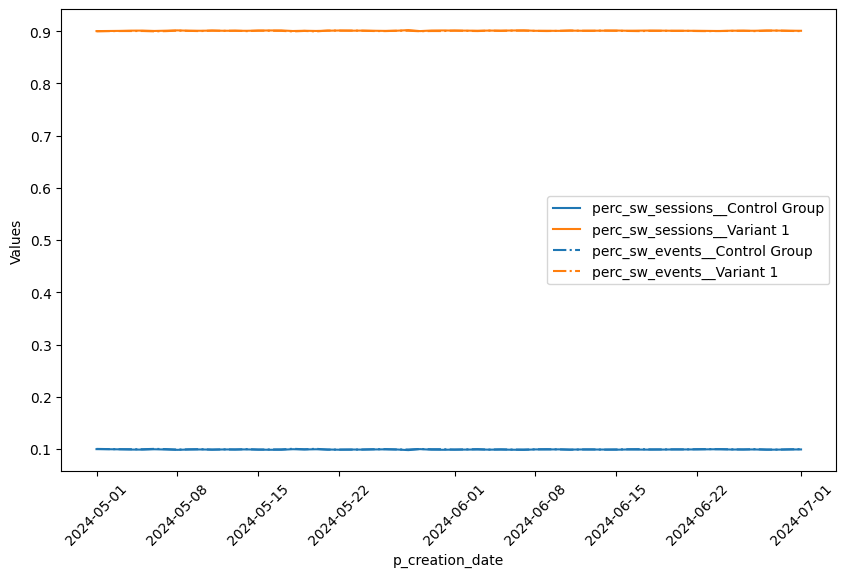

In [140]:
v.multiple_variable_lineplot(
    'p_creation_date',
    ['perc_sw_sessions__Control Group','perc_sw_sessions__Variant 1',
     'perc_sw_events__Control Group','perc_sw_events__Variant 1'],
    colors=['blue','orange','blue','orange'],
    style=['s1','s1','s3','s3']
)

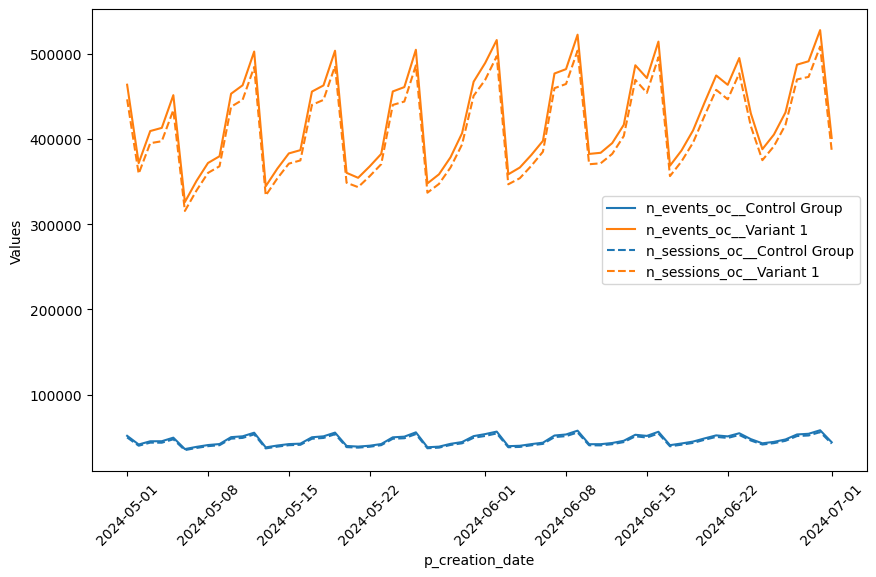

In [141]:
v.multiple_variable_lineplot(
    'p_creation_date',
    ['n_events_oc__Control Group','n_events_oc__Variant 1',
     'n_sessions_oc__Control Group','n_sessions_oc__Variant 1'],
    colors=['blue','orange','blue','orange'],
    style=['s1','s1','s2','s2']
)

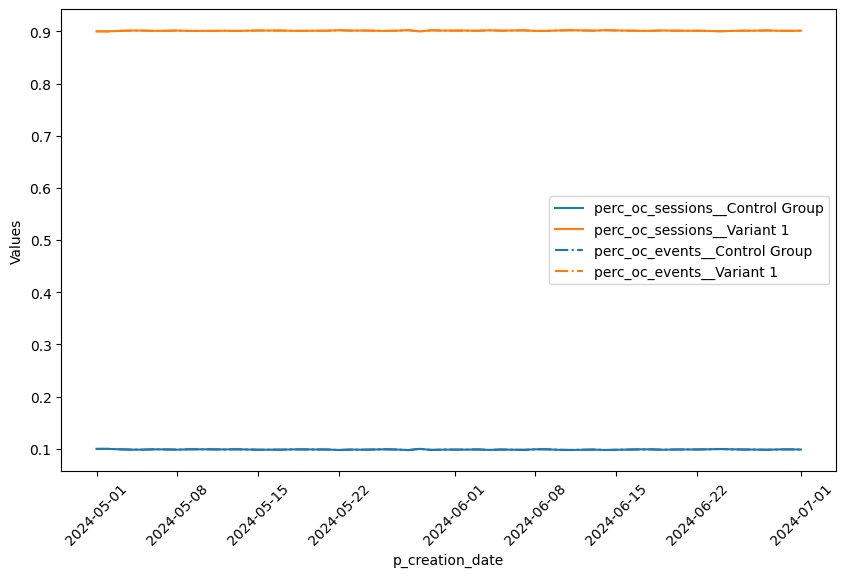

In [142]:
v.multiple_variable_lineplot(
    'p_creation_date',
    ['perc_oc_sessions__Control Group','perc_oc_sessions__Variant 1',
     'perc_oc_events__Control Group','perc_oc_events__Variant 1'],
    colors=['blue','orange','blue','orange'],
    style=['s1','s1','s3','s3']
)

#### Groceries

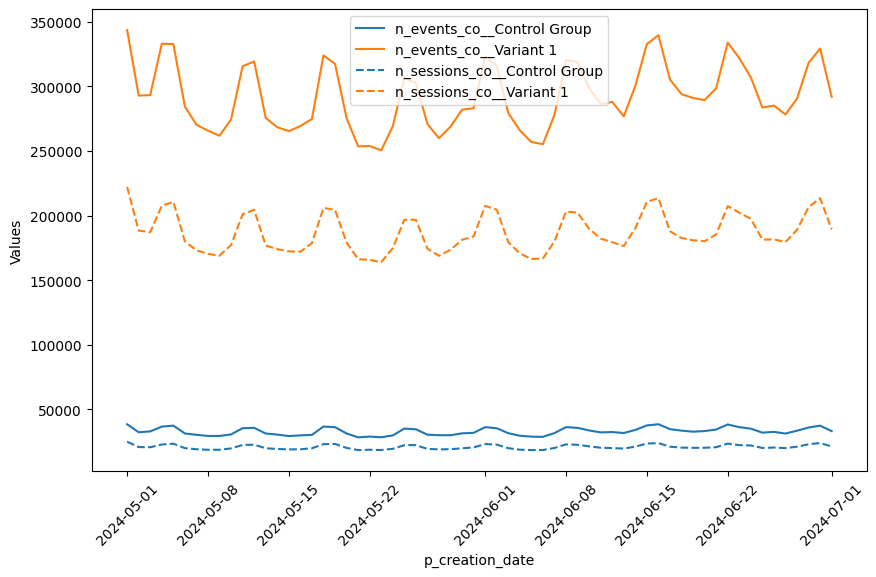

In [143]:
tmp = df.copy()

tmp['variant'] = tmp['variant'].fillna('undefined')
tmp['category'] = tmp['category'].fillna('undefined')

START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Groceries'
cond4 = tmp['variant'].isin(['Variant 1','Control Group'])

tmp = tmp[cond1 & cond2 & cond3 & cond4]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_co','n_sessions_sw','n_sessions_oc','n_events_co','n_events_sw','n_events_oc'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

# sessions percentage
df_pivoted['total_sw_sessions'] = df_pivoted['n_sessions_sw__Variant 1'] + df_pivoted['n_sessions_sw__Control Group']
df_pivoted['perc_sw_sessions__Variant 1'] = df_pivoted['n_sessions_sw__Variant 1']/df_pivoted['total_sw_sessions']
df_pivoted['perc_sw_sessions__Control Group'] = df_pivoted['n_sessions_sw__Control Group']/df_pivoted['total_sw_sessions']

df_pivoted['total_co_sessions'] = df_pivoted['n_sessions_co__Variant 1'] + df_pivoted['n_sessions_co__Control Group']
df_pivoted['perc_co_sessions__Variant 1'] = df_pivoted['n_sessions_co__Variant 1']/df_pivoted['total_co_sessions']
df_pivoted['perc_co_sessions__Control Group'] = df_pivoted['n_sessions_co__Control Group']/df_pivoted['total_co_sessions']

df_pivoted['total_oc_sessions'] = df_pivoted['n_sessions_oc__Variant 1'] + df_pivoted['n_sessions_oc__Control Group']
df_pivoted['perc_oc_sessions__Variant 1'] = df_pivoted['n_sessions_oc__Variant 1']/df_pivoted['total_oc_sessions']
df_pivoted['perc_oc_sessions__Control Group'] = df_pivoted['n_sessions_oc__Control Group']/df_pivoted['total_oc_sessions']

# events percentage
df_pivoted['total_sw_events'] = df_pivoted['n_events_sw__Variant 1'] + df_pivoted['n_events_sw__Control Group']
df_pivoted['perc_sw_events__Variant 1'] = df_pivoted['n_events_sw__Variant 1']/df_pivoted['total_sw_events']
df_pivoted['perc_sw_events__Control Group'] = df_pivoted['n_events_sw__Control Group']/df_pivoted['total_sw_events']

df_pivoted['total_co_events'] = df_pivoted['n_events_co__Variant 1'] + df_pivoted['n_events_co__Control Group']
df_pivoted['perc_co_events__Variant 1'] = df_pivoted['n_events_co__Variant 1']/df_pivoted['total_co_events']
df_pivoted['perc_co_events__Control Group'] = df_pivoted['n_events_co__Control Group']/df_pivoted['total_co_events']

df_pivoted['total_oc_events'] = df_pivoted['n_events_oc__Variant 1'] + df_pivoted['n_events_oc__Control Group']
df_pivoted['perc_oc_events__Variant 1'] = df_pivoted['n_events_oc__Variant 1']/df_pivoted['total_oc_events']
df_pivoted['perc_oc_events__Control Group'] = df_pivoted['n_events_oc__Control Group']/df_pivoted['total_oc_events']


v = dataframe_visualizer.DataFrameVisualizer(df_pivoted)

v.multiple_variable_lineplot(
    'p_creation_date',
    ['n_events_co__Control Group','n_events_co__Variant 1',
     'n_sessions_co__Control Group','n_sessions_co__Variant 1'],
    colors=['blue','orange','blue','orange'],
    style=['s1','s1','s2','s2']
)

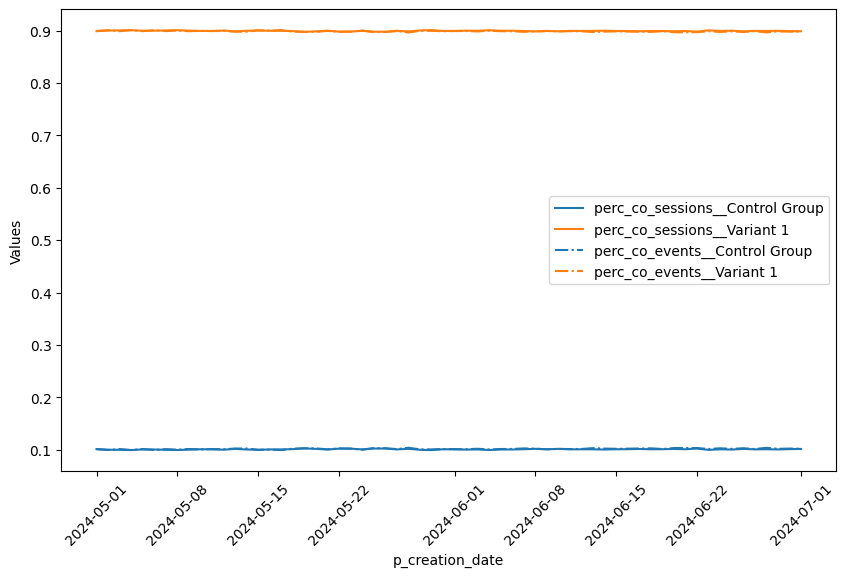

In [144]:
v.multiple_variable_lineplot(
    'p_creation_date',
    ['perc_co_sessions__Control Group','perc_co_sessions__Variant 1',
     'perc_co_events__Control Group','perc_co_events__Variant 1'],
    colors=['blue','orange','blue','orange'],
    style=['s1','s1','s3','s3']
)

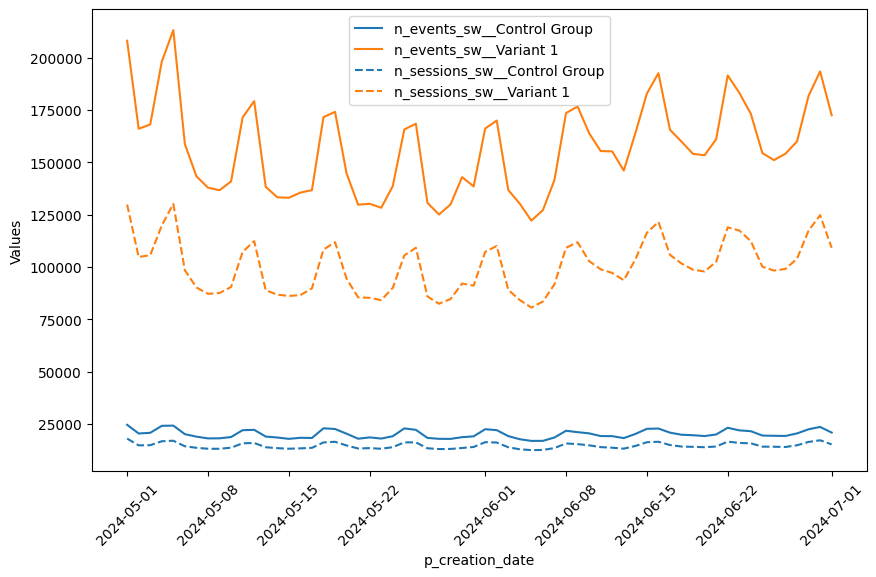

In [145]:
v.multiple_variable_lineplot(
    'p_creation_date',
    ['n_events_sw__Control Group','n_events_sw__Variant 1',
     'n_sessions_sw__Control Group','n_sessions_sw__Variant 1'],
    colors=['blue','orange','blue','orange'],
    style=['s1','s1','s2','s2']
)

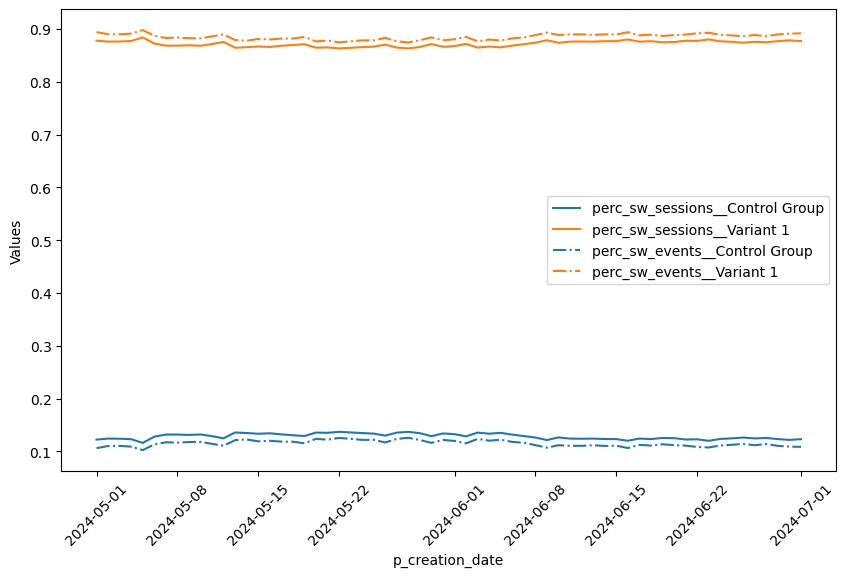

In [146]:
v.multiple_variable_lineplot(
    'p_creation_date',
    ['perc_sw_sessions__Control Group','perc_sw_sessions__Variant 1',
     'perc_sw_events__Control Group','perc_sw_events__Variant 1'],
    colors=['blue','orange','blue','orange'],
    style=['s1','s1','s3','s3']
)

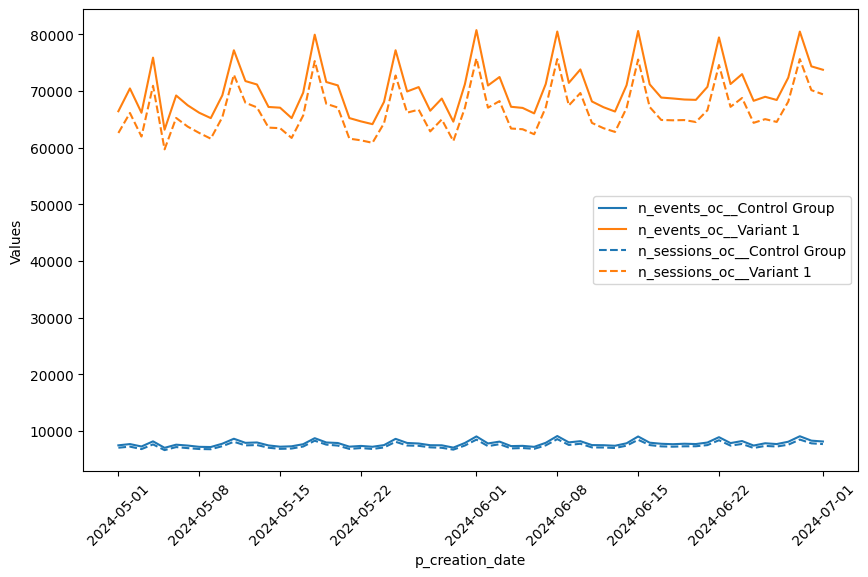

In [147]:
v.multiple_variable_lineplot(
    'p_creation_date',
    ['n_events_oc__Control Group','n_events_oc__Variant 1',
     'n_sessions_oc__Control Group','n_sessions_oc__Variant 1'],
    colors=['blue','orange','blue','orange'],
    style=['s1','s1','s2','s2']
)

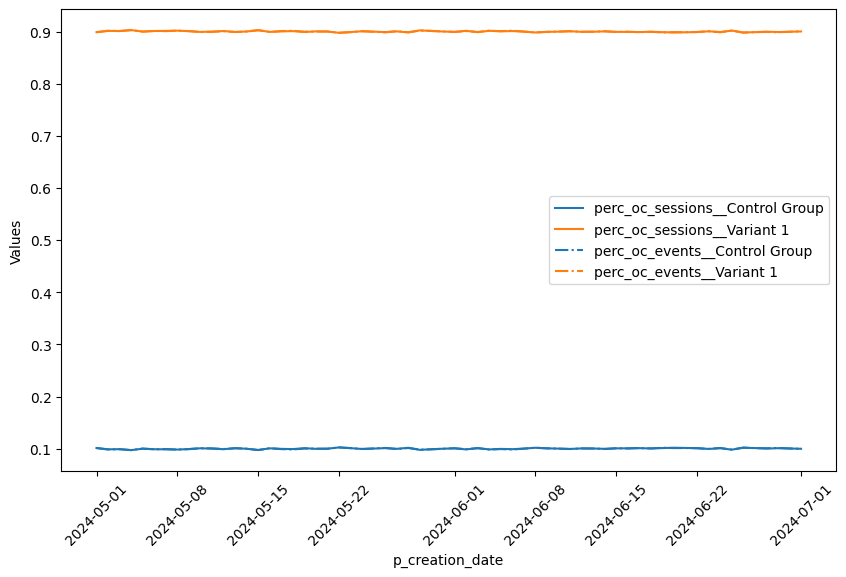

In [148]:
v.multiple_variable_lineplot(
    'p_creation_date',
    ['perc_oc_sessions__Control Group','perc_oc_sessions__Variant 1',
     'perc_oc_events__Control Group','perc_oc_events__Variant 1'],
    colors=['blue','orange','blue','orange'],
    style=['s1','s1','s3','s3']
)

### (4) CVR % 

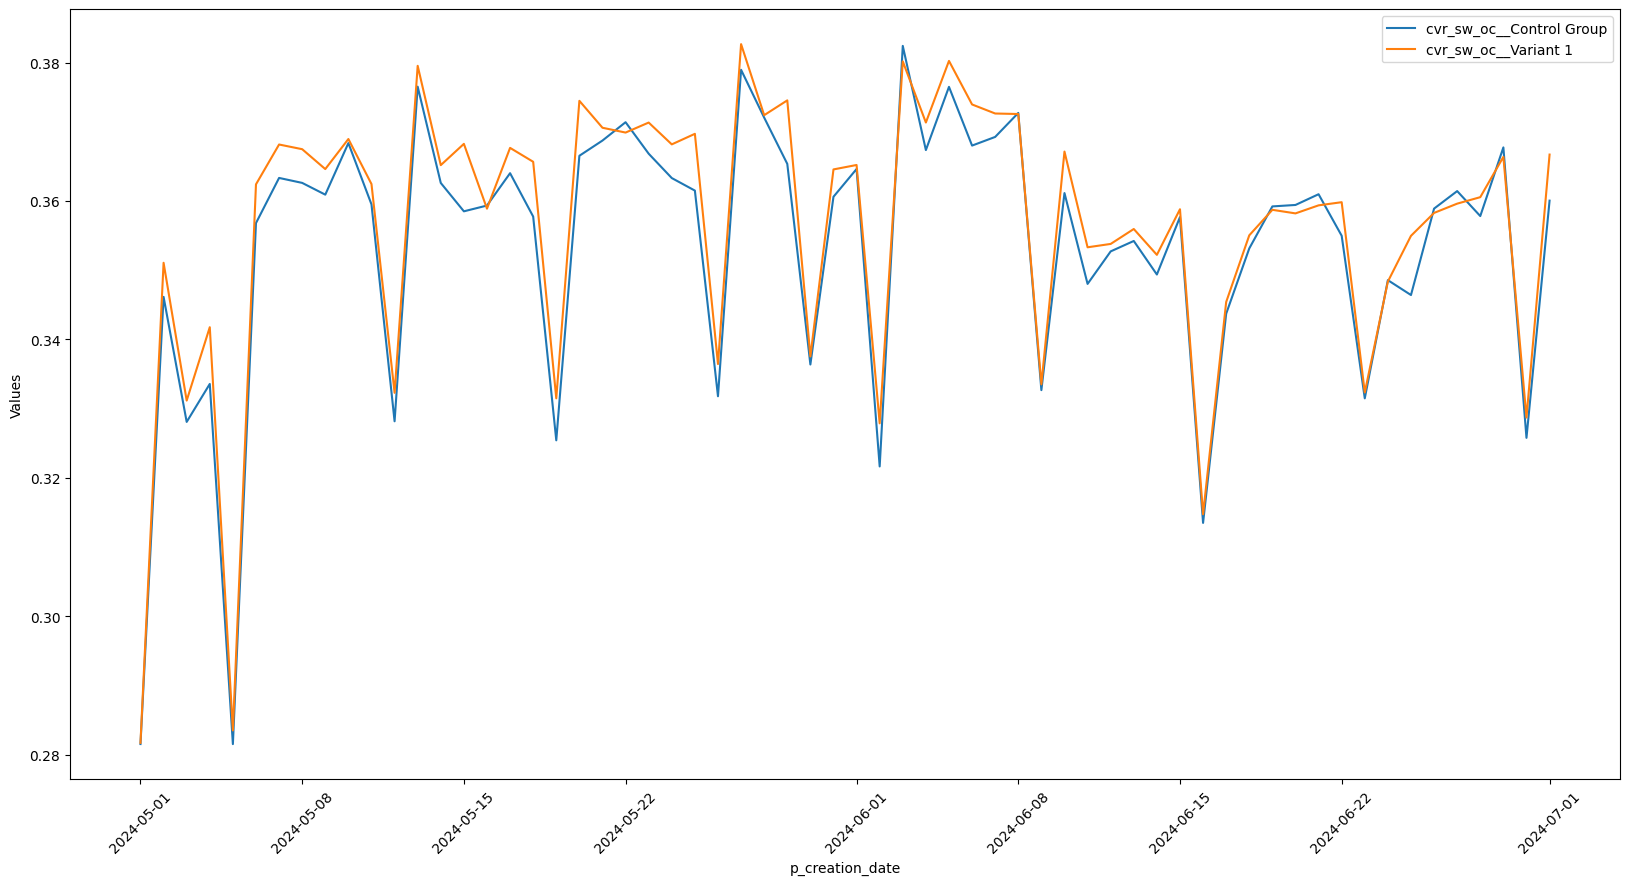

In [154]:
tmp = df.copy()

tmp['variant'] = tmp['variant'].fillna('undefined')
tmp['category'] = tmp['category'].fillna('undefined')

START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Groceries'
cond4 = tmp['variant'].isin(['Control Group','Variant 1'])

tmp = tmp[cond1 & cond2 & cond3 & cond4]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_co','n_sessions_sw','n_sessions_oc'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

# Distribution between variants

df_pivoted['cvr_sw_oc__Control Group'] = df_pivoted['n_sessions_oc__Control Group']/df_pivoted['n_sessions_co__Control Group']
df_pivoted['cvr_sw_oc__Variant 1'] = df_pivoted['n_sessions_oc__Variant 1']/df_pivoted['n_sessions_co__Variant 1']

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date'
    ,['cvr_sw_oc__Control Group','cvr_sw_oc__Variant 1']
    ,colors=['blue', 'orange']
)

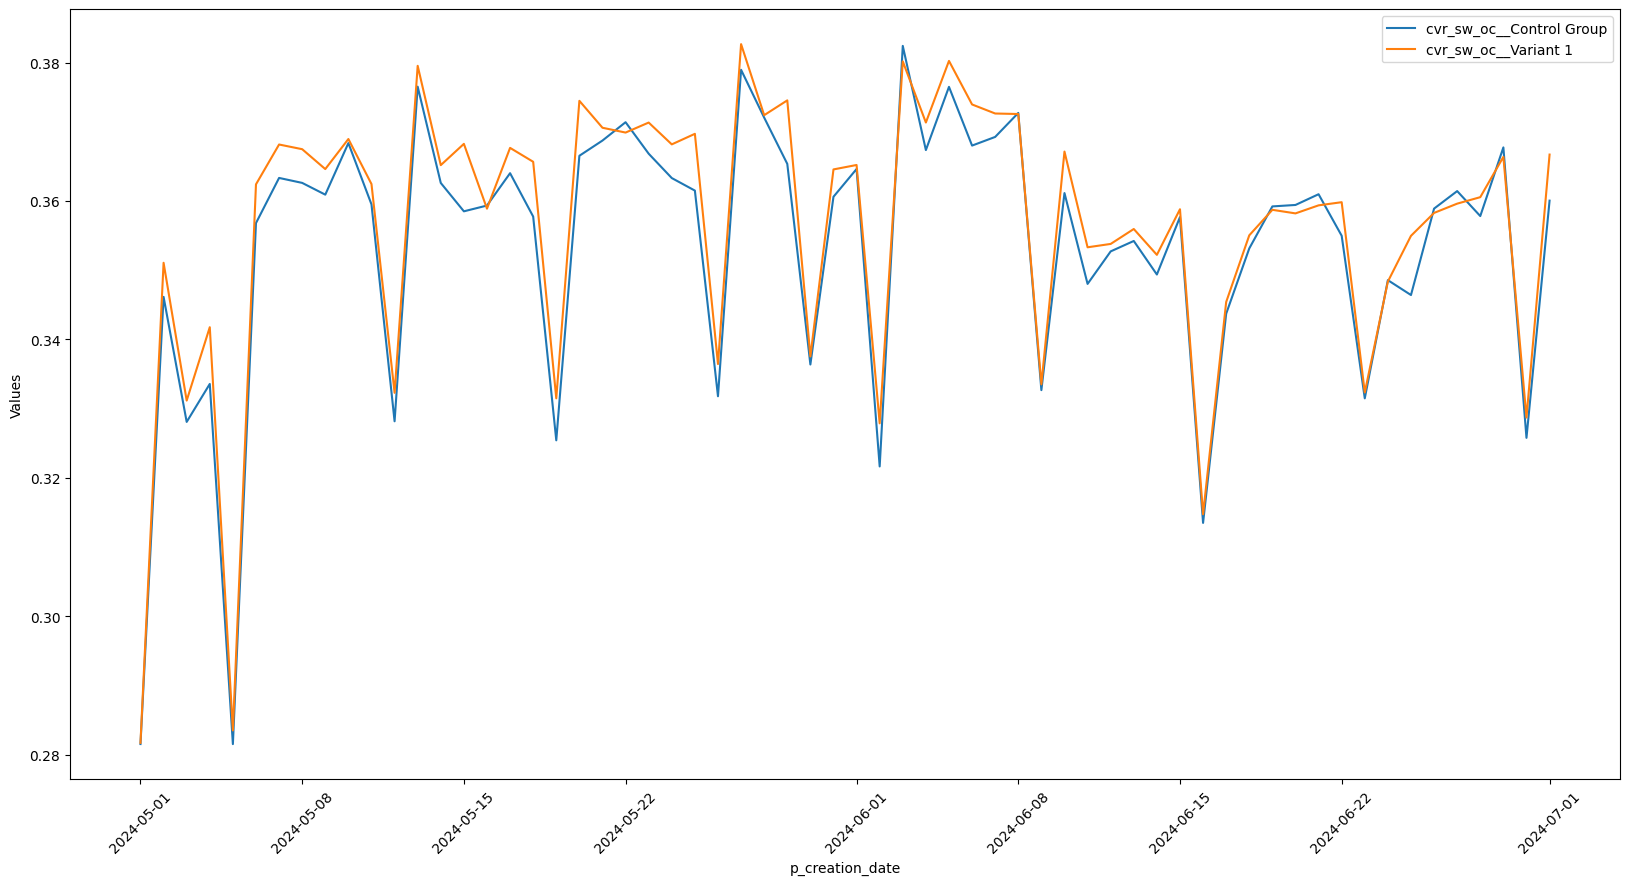

In [107]:
tmp = df.copy()

tmp['variant'] = tmp['variant'].fillna('undefined')
tmp['category'] = tmp['category'].fillna('undefined')

START_DATE = "'2024-01-01'"
END_DATE = "'2024-08-01'"

tmp['p_creation_date'] = pd.to_datetime(tmp['p_creation_date'])

cond1 = tmp['p_creation_date'] >= pd.to_datetime(START_DATE)
cond2 = tmp['p_creation_date'] <= pd.to_datetime(END_DATE)
cond3 = tmp['category'] == 'Groceries'
cond4 = tmp['variant'].isin(['Control Group','Variant 1'])

tmp = tmp[cond1 & cond2 & cond3 & cond4]

tmp = tmp.drop(columns=['category'])

df_pivoted = tmp.pivot(index='p_creation_date', columns='variant', values=['n_sessions_co','n_sessions_sw','n_sessions_oc'])

# Flatten the multiindex columns 
df_pivoted.columns = [f'{col[0]}__{col[1]}' for col in df_pivoted.columns]
df_pivoted = df_pivoted.reset_index()

df_pivoted = df_pivoted.fillna(0)

# Distribution between variants

df_pivoted['cvr_sw_oc__Control Group'] = df_pivoted['n_sessions_oc__Control Group']/df_pivoted['n_sessions_sw__Control Group']
df_pivoted['cvr_sw_oc__Variant 1'] = df_pivoted['n_sessions_oc__Variant 1']/df_pivoted['n_sessions_sw__Variant 1']

v = dataframe_visualizer.DataFrameVisualizer(df_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date'
    ,['cvr_sw_oc__Control Group','cvr_sw_oc__Variant 1']
    ,colors=['blue', 'orange']
)

### tmp

In [80]:
#pd.set_option('display.max_rows', None)

pd.reset_option('display.max_rows')

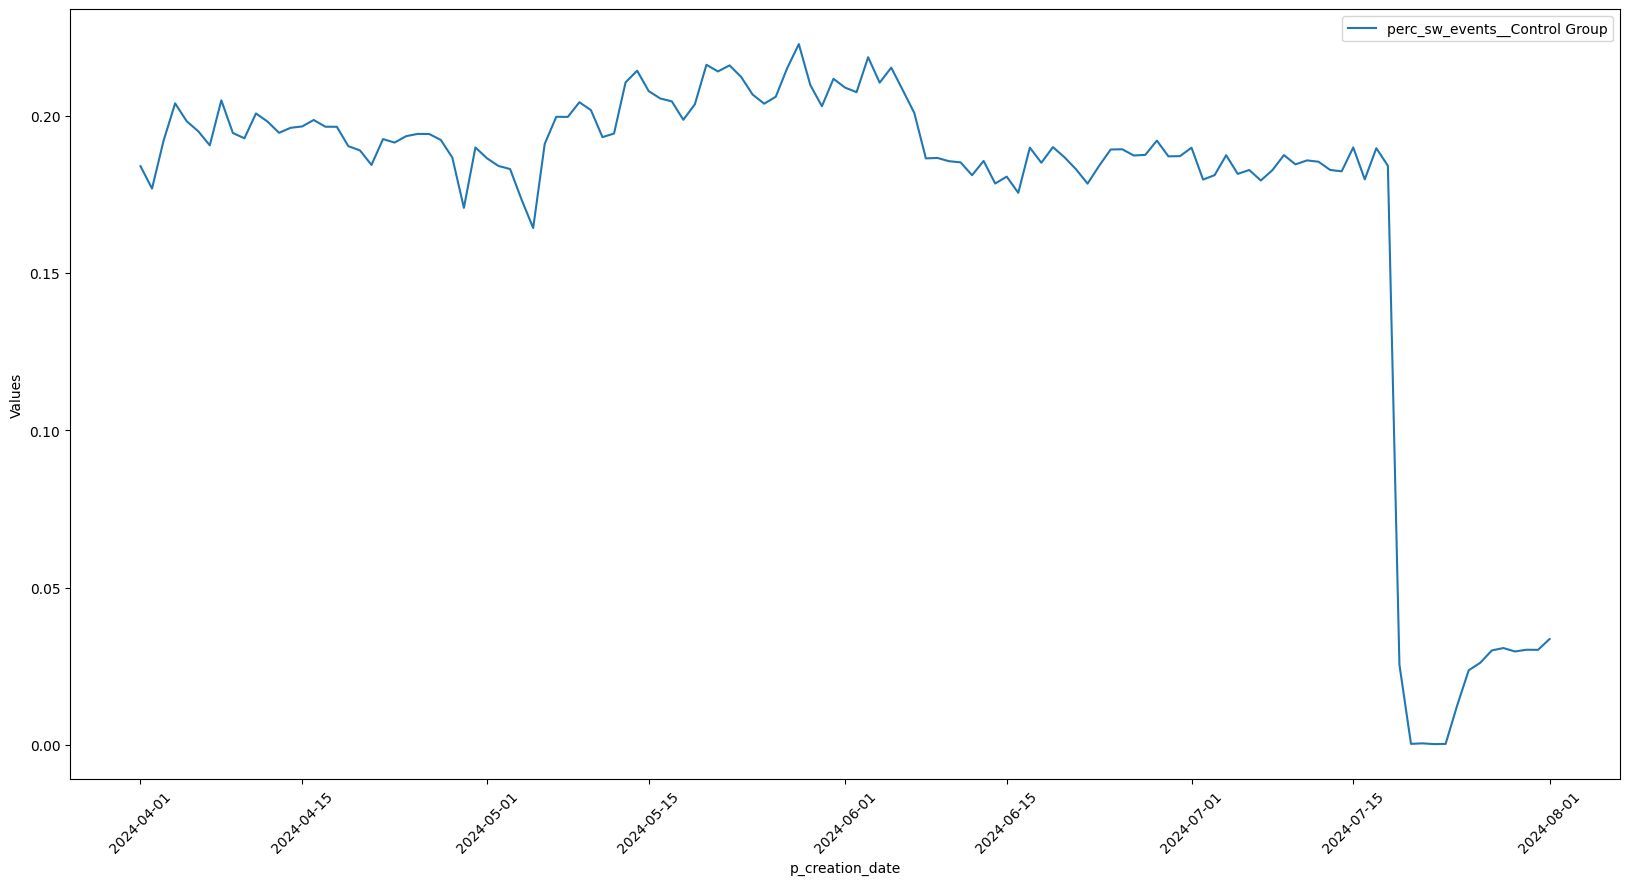

In [74]:
v = dataframe_visualizer.DataFrameVisualizer(tmp_pivoted, fig_size=(20,10))

v.multiple_variable_lineplot(
    'p_creation_date'
    ,['perc_sw_events__Control Group']
    ,colors=['blue']
)

In [73]:
START_DATE = '2024-04-01'
END_DATE = '2024-08-01'

cond_1 = df_pivoted['p_creation_date'] >= START_DATE
cond_2 = df_pivoted['p_creation_date'] <= END_DATE

tmp_pivoted = df_pivoted[cond_1 & cond_2][['p_creation_date',
                                           'n_events_sw__Control Group',
                                           'n_events_sw__Variant 1',
                                           'perc_sw_events__Control Group']]

tmp_pivoted

,p_creation_date,n_events_sw__Control Group,n_events_sw__Variant 1,perc_sw_events__Control Group
91,2024-04-01,18088,80268,0.183903
92,2024-04-02,16674,77638,0.176796
93,2024-04-03,14445,60789,0.192001
94,2024-04-04,14008,54702,0.203871
95,2024-04-05,15332,62029,0.198188
96,2024-04-06,17578,72562,0.195008
97,2024-04-07,16920,71886,0.190528
98,2024-04-08,15639,60712,0.204830
99,2024-04-09,15881,65792,0.194446
100,2024-04-10,16268,68123,0.192769
